# グラフ分割問題

## グラフ2分割問題

無向グラフ $G=(V,E)$ が偶数の頂点 $n=|V|$ を持つとき，頂点集合を等分割して得られる二つの頂点部分集合の間の辺の数を最小にする．

In [1]:
import random

random.seed(42)

def make_data(n, prob):
    V = range(1, n+1)
    E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
    return V, E

二次の定式化

\begin{align*}
\mathrm{minimize\ }     &\sum_{(i,j) \in E} x_i (1-x_j) + (1-x_i)x_j \\
\mathrm{subject\ to\ }  &\sum_{i\in V} x_i = n/2 \\
                        &x_i \in \{0,1\} \quad \forall i \in V
\end{align*}

In [2]:
from pyscipopt import Model, quicksum

V, E = make_data(10, 0.4)

model = Model("gpp")
x = {}
for i in V:
    x[i] = model.addVar(vtype="B", name=f"x{i}")

z = model.addVar(name="obj")

model.addCons(quicksum(x[i] for i in V) == len(V)/2, "Partition")
model.addCons(
    z >= quicksum(x[i]*(1-x[j]) + x[j]*(1-x[i]) for (i,j) in E)
)
model.setObjective(
    z,
    sense='minimize'
)

model.optimize()


presolving:
(round 1, exhaustive) 0 del vars, 0 del conss, 20 add conss, 0 chg bounds, 0 chg sides, 0 chg coeffs, 1 upgd conss, 0 impls, 0 clqs
(round 2, fast)       0 del vars, 0 del conss, 20 add conss, 1 chg bounds, 0 chg sides, 0 chg coeffs, 1 upgd conss, 0 impls, 21 clqs
   (0.0s) probing cycle finished: starting next cycle
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (3 rounds: 3 fast, 2 medium, 2 exhaustive):
 0 deleted vars, 0 deleted constraints, 20 added constraints, 1 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 21 cliques
presolved problem has 31 variables (10 bin, 0 int, 21 impl, 0 cont) and 22 constraints
     20 constraints of type <and>
      2 constraints of type <linear>
transformed objective value is always integral (scale: 1)
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |v

一次の定式化

\begin{align*}
\mathrm{minimize\ }     &\sum_{(i,j) \in E} y_{ij} \\
\mathrm{subject\ to\ }  &\sum_{i\in V} x_i = n/2 \\
                        & x_i - x_j \le y_{ij} \quad \forall (i,j) \in E \\
                        & x_i - x_j \le y_{ij} \quad \forall (i,j) \in E \\
                        & x_i \in \{0,1\} \quad \forall i \in V \\
                        & y_{ij} \in \{0,1\} \quad \forall (i,j) \in E

\end{align*}

In [3]:
model = Model("gpp_linear")
x = {}
y = {}
for i in V:
    x[i] = model.addVar(vtype="B", name=f"x{i}")
for i, j in E:
    y[i,j] = model.addVar(vtype="B", name=f"y{i,j}")

model.addCons(quicksum(x[i] for i in V) == len(V)/2, "Partition")
for i, j in E:
    model.addCons(x[i] - x[j] <= y[i,j], f"Edge {i,j}")
    model.addCons(x[j] - x[i] <= y[i,j], f"Edge {j,i}")

model.setObjective(
    quicksum(y.values()),
    sense='minimize'
)

model.optimize()


presolving:
(round 1, exhaustive) 0 del vars, 0 del conss, 0 add conss, 0 chg bounds, 0 chg sides, 0 chg coeffs, 40 upgd conss, 0 impls, 0 clqs
   (0.0s) probing cycle finished: starting next cycle
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 2 medium, 2 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 30 variables (30 bin, 0 int, 0 impl, 0 cont) and 41 constraints
      1 constraints of type <linear>
     40 constraints of type <logicor>
transformed objective value is always integral (scale: 1)
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
p 0.0s|     1 |     0 |     0 |     - |   lo

In [4]:
sol = model.getSols()[0]
sol

{'x1': 0.0, 'x2': 1.0, 'x3': 0.0, 'x4': 1.0, 'x5': 0.0, 'x6': 1.0, 'x7': 1.0, 'x8': 1.0, 'x9': 0.0, 'x10': 0.0, 'y(1, 3)': 0.0, 'y(1, 4)': 1.0, 'y(1, 5)': 0.0, 'y(1, 9)': 0.0, 'y(2, 3)': 1.0, 'y(2, 4)': 0.0, 'y(2, 6)': 0.0, 'y(2, 7)': 0.0, 'y(2, 10)': 1.0, 'y(3, 6)': 1.0, 'y(3, 9)': 0.0, 'y(3, 10)': 0.0, 'y(4, 6)': 0.0, 'y(4, 7)': 0.0, 'y(4, 8)': 0.0, 'y(5, 10)': 0.0, 'y(7, 10)': 1.0, 'y(8, 9)': 1.0, 'y(8, 10)': 1.0, 'y(9, 10)': 0.0}

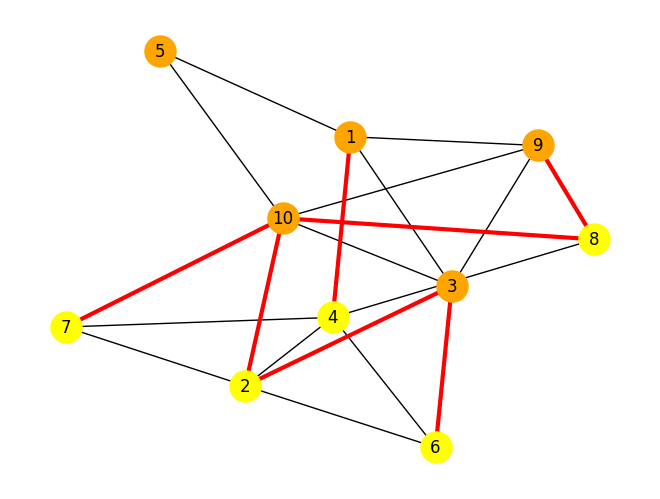

In [5]:
import networkx as nx

L = [i for i in V if sol[x[i]] >= 0.5]
R = [i for i in V if sol[x[i]] < 0.5]
cut = [
    (i,j) for (i,j) in E 
    if (i in L and j in R) or (i in R and j in L)
]

G = nx.from_edgelist(E)
pos = nx.layout.spring_layout(G, seed=42)
nx.draw(G, pos=pos, with_labels=True, node_size=500,
        node_color='yellow', nodelist=L)
nx.draw(G, pos=pos, with_labels=False, node_size=500,
        node_color='orange', nodelist=R,
        edgelist=cut, edge_color='red', width=3)


In [6]:
from amplpy import AMPL

ampl = AMPL()

ampl.option['solver'] = 'highs'
ampl.read("../ampl/gpp.mod")
ampl.set['V'] = list(V)
ampl.set['E'] = list(E)

ampl.solve()
z = ampl.obj['z']
print("Optimum:", z.value())

x = ampl.var['x']
L = [i for i in V if x[i].value() >.5]
R = [i for i in V if x[i].value() <.5]
print("L =", L)
print("R =", R)

y = ampl.var['y']
across = [(i,j) for (i,j) in E if y[i,j].value() > .5]
print("Across edges:", across)

HiGHS 1.10.0HiGHS 1.10.0: optimal solution; objective 7
1201 simplex iterations
3 branching nodes
Optimum: 7.0
L = [1, 3, 5, 9, 10]
R = [2, 4, 6, 7, 8]
Across edges: [(1, 4), (2, 3), (2, 10), (3, 6), (7, 10), (8, 9), (8, 10)]


## タブーサーチ

実装 (以下のTSとその拡張およびSAすべて): https://www.dcc.fc.up.pt/~jpp/code/py_metaheur/

In [7]:
from gpp_ts import construct, evaluate, tabu_search

rndseed = 2
random.seed(rndseed)
n = 100
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.2, pos=pos)

nodes = G.nodes()
adj = [set([]) for i in nodes]
for (i, j) in G.edges():
    adj[i].add(j)
    adj[j].add(i)

max_iterations = 1000
tabulen = len(nodes) / 2

sol = construct(nodes)
z, s, d = evaluate(nodes, adj, sol)
print("initial partition: z =", z)
print(sol)
print()
print("starting tabu search,", max_iterations, "iterations, tabu length =", tabulen)
sol, cost = tabu_search(nodes, adj, sol, max_iterations, tabulen)
print("final solution: z=", cost)
print(sol)

initial partition: z = 239.0
[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]

starting tabu search, 1000 iterations, tabu length = 50.0
final solution: z= 31.0
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]


## アニーリング法

In [8]:
from gpp_sa import evaluate, annealing

initprob = 0.4  # initial acceptance probability
sizefactor = 16  # for det. # tentatives at each temp.
tempfactor = 0.95  # cooling ratio
freezelim = 5  # max number of iterations with less that minpercent acceptances
minpercent = 0.02  # fraction of accepted moves for being not frozen
alpha = 3.0  # imballance factor
N = len(nodes)  # neighborhood size
L = N * sizefactor  # number of tentatives at current temperature

print("starting simulated annealing, parameters:")
print("   initial acceptance probability", initprob)
print("   cooling ratio", tempfactor)
print("   # tentatives at each temp.", L)
print("   percentage of accepted moves for being not frozen", minpercent)
print("   max # of it.with less that minpercent acceptances", freezelim)
print("   imballance factor", alpha)
print()
sol = construct(nodes)  # starting solution
z, bal, s, d = evaluate(nodes, adj, sol, alpha)
print("initial partition: z =", z)
print(sol)
print()

LOG = False
sol, z = annealing(
    nodes, adj, sol, initprob, L, tempfactor, freezelim, minpercent, alpha, report=False
)
zp, bal, sp, dp = evaluate(nodes, adj, sol, alpha)
assert abs(zp - z) < 1.0e-9  # floating point approx.equality

print()
print("final solution: z=", z)
print(sol)

starting simulated annealing, parameters:
   initial acceptance probability 0.4
   cooling ratio 0.95
   # tentatives at each temp. 1600
   percentage of accepted moves for being not frozen 0.02
   max # of it.with less that minpercent acceptances 5
   imballance factor 3.0

initial partition: z = 238.0
[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

initial acceptance rate: 0.4
initial temperature: 6.943206487206145

initial temp: 6.943206487206145  current objective: 238.0 (bal = 0)
current solution: [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 

## 集中化と多様化を入れたタブーサーチ

In [9]:
from gpp_ts_intdiv import ts_intens_divers

sol = construct(nodes)
print("initial partition: z =", z)
print(sol)
print()
print("starting tabu search,", max_iterations, "iterations, tabu length =", tabulen)
sol, cost = ts_intens_divers(nodes, adj, sol, max_iterations, tabulen, report=False)
print("final solution: z=", cost)
print(sol)

initial partition: z = 33.0
[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]

starting tabu search, 1000 iterations, tabu length = 50.0
final solution: z= 31.0
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0]


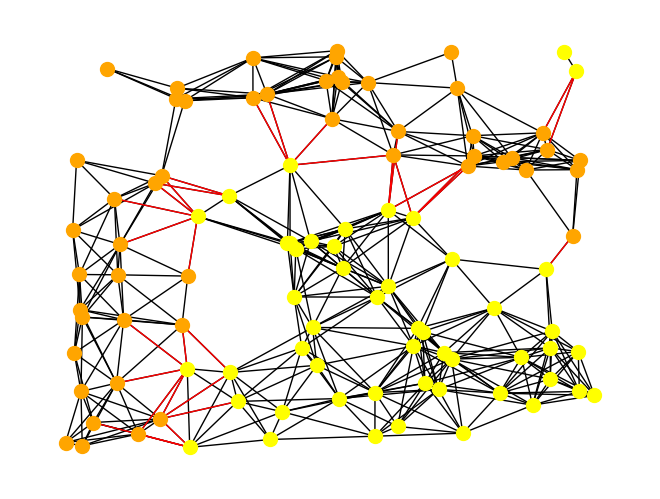

In [10]:
L = [i for i in nodes if sol[i] == 1]
R = [i for i in nodes if sol[i] == 0]
edgelist = [
    (i, j) for (i, j) in G.edges() if (i in L and j in R) or (i in R and j in L)
]
nx.draw(G, pos=pos, with_labels=False, node_size=100, node_color="yellow", nodelist=L)
nx.draw(
    G,
    pos=pos,
    with_labels=False,
    node_size=100,
    nodelist=R,
    node_color="Orange",
    edgelist=edgelist,
    edge_color="red",
)